<a href="https://colab.research.google.com/github/sachinkun21/HuggingFace_lessons/blob/main/Lesson2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 36.2 MB/s 
     |████████████████████████████████| 895 kB 40.4 MB/s 
     |████████████████████████████████| 596 kB 41.7 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 4.5 MB/s 
     |████████████████████████████████| 1.1 MB 48.5 MB/s 
     |████████████████████████████████| 136 kB 46.8 MB/s 
     |████████████████████████████████| 212 kB 43.5 MB/s 
     |████████████████████████████████| 127 kB 49.0 MB/s 
     |████████████████████████████████| 144 kB 53.4 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 271 kB 49.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib

In [3]:
from datasets import list_datasets

print(len(list_datasets()))
print(list_datasets()[:5])

4301
['assin', 'ar_res_reviews', 'ambig_qa', 'bianet', 'ag_news']


In [4]:
from datasets import load_dataset

emotions = load_dataset('emotion')

Using custom data configuration default


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
print(emotions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [9]:
train_ds = emotions['train']
print(train_ds[0:5])
print(train_ds.features)

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [10]:
# set format to pandas
import pandas as pd

emotions.set_format('pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
# apply labels

def label_int2str(int_label):
  return emotions["train"].features['label'].int2str(int_label)

df['label_name'] = df['label'].map(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### EDA

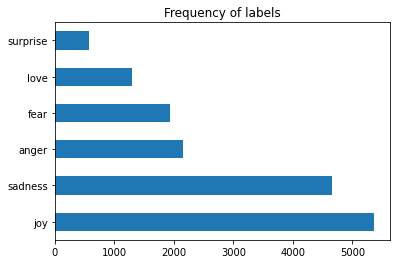

In [16]:
# Class distribution
import matplotlib.pyplot as plt

df["label_name"].value_counts().plot(kind = 'barh')
plt.title("Frequency of labels")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


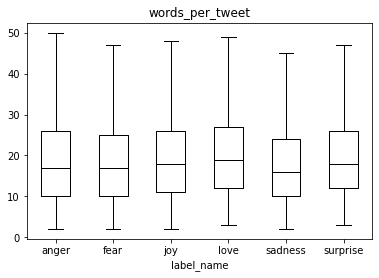

In [22]:
# length of tweets

df["words_per_tweet"] = df['text'].map(lambda x : len(x.split(" ")))
df.boxplot("words_per_tweet", by = "label_name", grid = False, showfliers = False, color = 'black')
plt.suptitle("")
plt.show()

# tokenization

In [26]:
# tokenization
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

sample_text = "Hi my name is Sachin Kaushik"

encoded_text = tokenizer(sample_text)
print("Encoded Text: ", encoded_text)

Encoded Text:  {'input_ids': [101, 7632, 2026, 2171, 2003, 17266, 10606, 10556, 20668, 5480, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [28]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'hi', 'my', 'name', 'is', 'sac', '##hin', 'ka', '##ush', '##ik', '[SEP]']


In [30]:
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)
print(tokenizer.model_input_names)


30522
512
['input_ids', 'attention_mask']


### Tokenizing the whole dataset

In [ ]:
def tokenize_batch(batch):
  return tokenize(batch['text']), padding = True, truncation = True)

